In [3]:
import pandas_gbq as gbq
import pandas as pd
import numpy as np
import pydata_google_auth
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
def bigquery_auth():
    SCOPES = [
    'https://www.googleapis.com/auth/cloud-platform',
    'https://www.googleapis.com/auth/drive',]
    
    credentials = pydata_google_auth.get_user_credentials(
    SCOPES,
    # Set auth_local_webserver to True to have a slightly more convienient
    # authorization flow. Note, this doesn't work if you're running from a
    # notebook on a remote sever, such as over SSH or with Google Colab.
    auth_local_webserver=True,)
    
bigquery_auth()

In [5]:
def plot_state_distribution(df, plot_title):
    plt.figure(figsize=(10,10))
    df = df.sort_values(by='user_amount').reset_index(drop=True)
    ax = sns.barplot(x=df.state, y=df.user_amount)
    ax.set(xlabel="State", ylabel='User Amount')
    ax.set_title(plot_title)
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    plt.show()

In [6]:
def plot_state_partisan(df, plot_title):
    plt.figure(figsize=(10,10))
    df = df.sort_values(by='Trump_share').reset_index(drop=True)
    ax = sns.barplot(x=df.state, y=df.Trump_share)
    ax.axhline(0.5, ls='--')
    ax.set(xlabel="State", ylabel='Trump Share')
    ax.set_title(plot_title)
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    plt.show()

In [7]:
def plot_state_ideology(df, plot_title):
    plt.figure(figsize=(10,10))
    df = df.sort_values(by='mean_ideology').reset_index(drop=True)
    ax = sns.barplot(x=df.state, y=df.mean_ideology)
    ax.set(xlabel="State", ylabel='Mean Ideology')
    ax.set_title(plot_title)
    for item in ax.get_xticklabels():
        item.set_rotation(90)
    plt.show()

In [27]:
state_primary_all_query = '''
WITH USER_PARTISAN AS (
SELECT CAST(user_id AS STRING) AS user_id,
       user_PC1_mean_weighted AS user_ideology,
      CASE WHEN ABS(user_PC1_mean_weighted - 0.5564000026852998) < ABS(user_PC1_mean_weighted + 0.5878117419195912) THEN 'Trump' ELSE 'Clinton' END AS party
FROM `us_user_info.us_user_ideology_from_1000_page_and_politician_201501_to_201611_all`)
, USER_STATE AS (
SELECT user_id,
        state
FROM `us_user_info.user_like_state_max_exclude_pimary_all`)
SELECT state,
        COUNT(*) AS user_amount,
        SUM(CASE WHEN party = 'Trump' THEN 1 ELSE 0 END)/ COUNT(*) AS Trump_share,
        SUM(CASE WHEN party = 'Clinton' THEN 1 ELSE 0 END)/ COUNT(*) AS Clinton_share,
        AVG(user_ideology) AS mean_ideology
FROM
(SELECT USER_PARTISAN.user_id,
        USER_PARTISAN.party,
        USER_PARTISAN.user_ideology,
        USER_STATE.state
FROM USER_PARTISAN
INNER JOIN USER_STATE ON USER_PARTISAN.user_id = USER_STATE.user_id) AS USER_INFO
GROUP BY state
ORDER BY state
'''

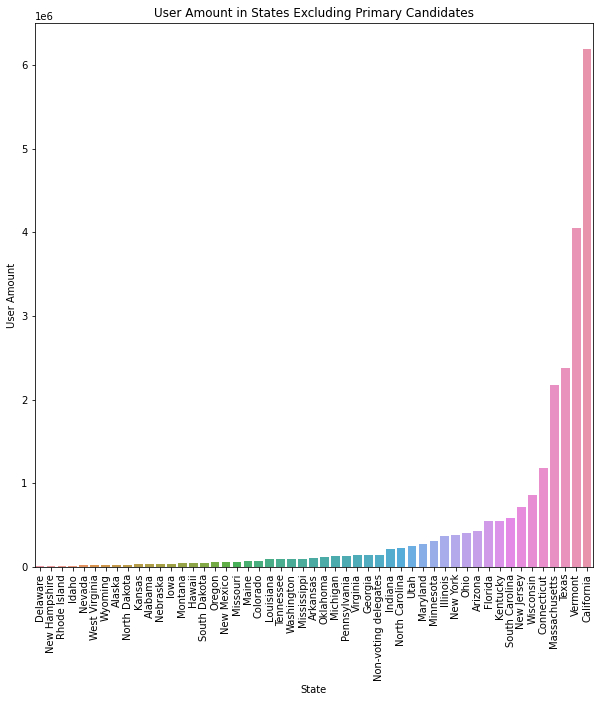

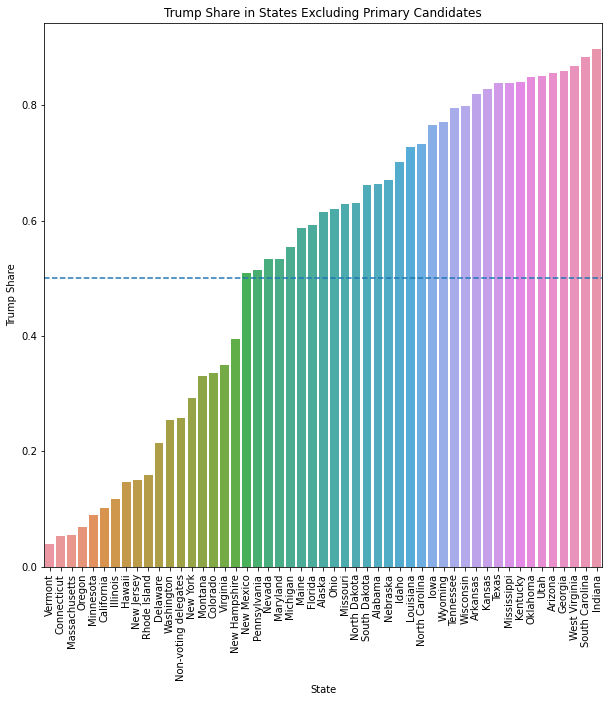

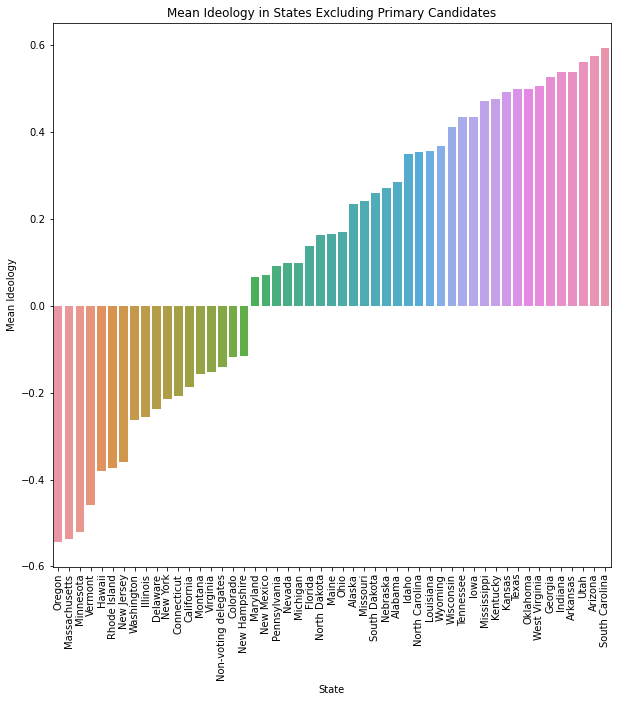

In [30]:
df = gbq.read_gbq(state_primary_all_query, project_id='ntufbdata')
plot_state_distribution(df, 'User Amount in States Excluding Primary Candidates')
plot_state_partisan(df, 'Trump Share in States Excluding Primary Candidates')
plot_state_ideology(df, 'Mean Ideology in States Excluding Primary Candidates')

In [10]:
state_primary_query = '''
WITH USER_PARTISAN AS (
SELECT CAST(user_id AS STRING) AS user_id,
       user_PC1_mean_weighted AS user_ideology,
      CASE WHEN ABS(user_PC1_mean_weighted - 0.5564000026852998) < ABS(user_PC1_mean_weighted + 0.5878117419195912) THEN 'Trump' ELSE 'Clinton' END AS party
FROM `us_user_info.us_user_ideology_from_1000_page_and_politician_201501_to_201611_all`)
, USER_STATE AS (
SELECT user_id,
        state
FROM `us_user_info.user_like_state_max_exclude_primary`)
SELECT state,
        COUNT(*) AS user_amount,
        SUM(CASE WHEN party = 'Trump' THEN 1 ELSE 0 END)/ COUNT(*) AS Trump_share,
        SUM(CASE WHEN party = 'Clinton' THEN 1 ELSE 0 END)/ COUNT(*) AS Clinton_share,
        AVG(user_ideology) AS mean_ideology
FROM
(SELECT USER_PARTISAN.user_id,
        USER_PARTISAN.party,
        USER_PARTISAN.user_ideology,
        USER_STATE.state
FROM USER_PARTISAN
INNER JOIN USER_STATE ON USER_PARTISAN.user_id = USER_STATE.user_id) AS USER_INFO
GROUP BY state
ORDER BY state
'''

Downloading: 100%|██████████| 52/52 [00:00<00:00, 199.28rows/s]


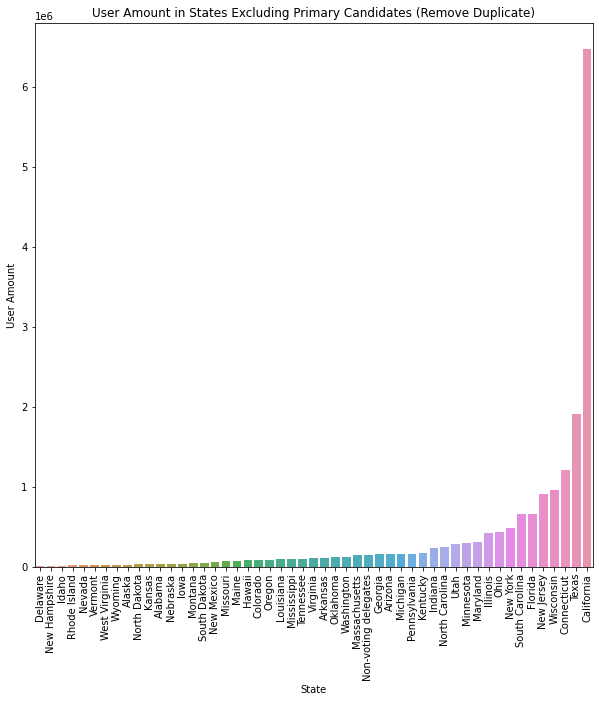

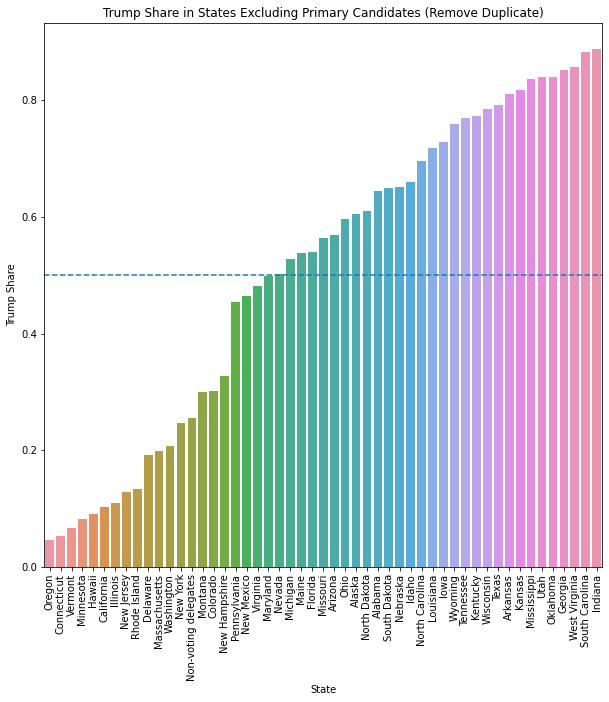

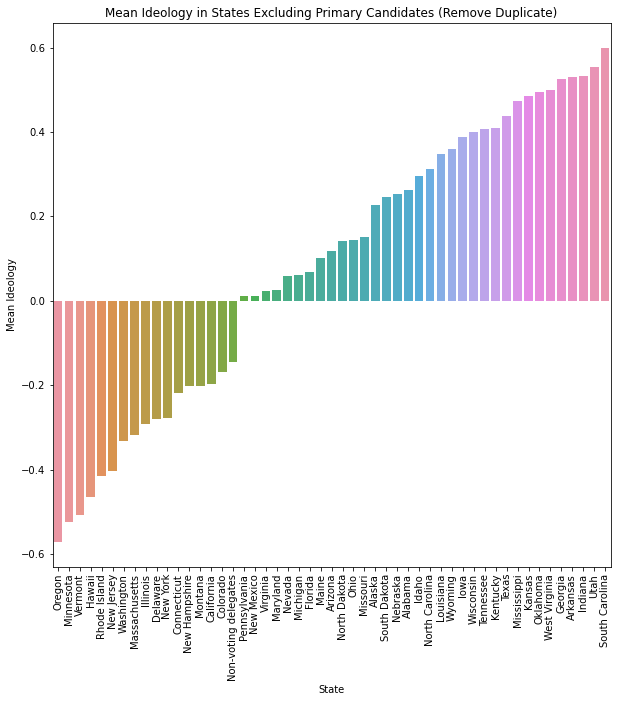

In [11]:
df = gbq.read_gbq(state_primary_query, project_id='ntufbdata')
plot_state_distribution(df, 'User Amount in States Excluding Primary Candidates (Remove Duplicate)')
plot_state_partisan(df, 'Trump Share in States Excluding Primary Candidates (Remove Duplicate)')
plot_state_ideology(df, 'Mean Ideology in States Excluding Primary Candidates (Remove Duplicate)')

In [15]:
state_all_query = '''
WITH USER_PARTISAN AS (
SELECT CAST(user_id AS STRING) AS user_id,
       user_PC1_mean_weighted AS user_ideology,
      CASE WHEN ABS(user_PC1_mean_weighted - 0.5564000026852998) < ABS(user_PC1_mean_weighted + 0.5878117419195912) THEN 'Trump' ELSE 'Clinton' END AS party
FROM `us_user_info.us_user_ideology_from_1000_page_and_politician_201501_to_201611_all`)
, USER_STATE AS (
SELECT CAST(user_id AS STRING) AS user_id,
        like_state_max AS state
FROM `us_user_info.us_user_like_state_max`)
SELECT state,
        COUNT(*) AS user_amount,
        SUM(CASE WHEN party = 'Trump' THEN 1 ELSE 0 END)/ COUNT(*) AS Trump_share,
        SUM(CASE WHEN party = 'Clinton' THEN 1 ELSE 0 END)/ COUNT(*) AS Clinton_share,
        AVG(user_ideology) AS mean_ideology
FROM
(SELECT USER_PARTISAN.user_id,
        USER_PARTISAN.party,
        USER_PARTISAN.user_ideology,
        USER_STATE.state
FROM USER_PARTISAN
INNER JOIN USER_STATE ON USER_PARTISAN.user_id = USER_STATE.user_id) AS USER_INFO
GROUP BY state
ORDER BY state
'''

Downloading: 100%|██████████| 52/52 [00:01<00:00, 45.74rows/s]


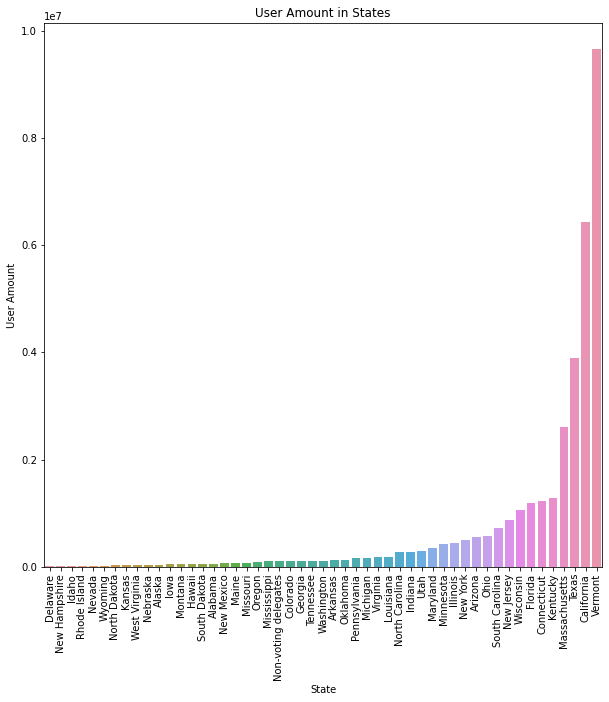

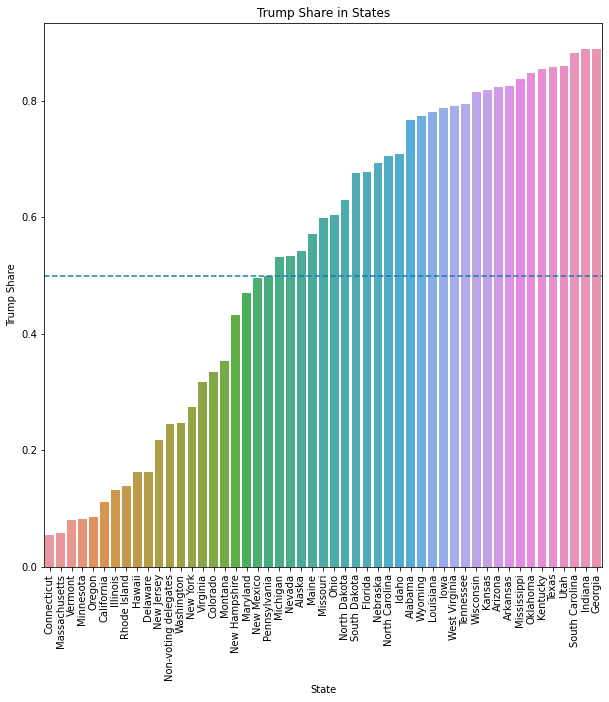

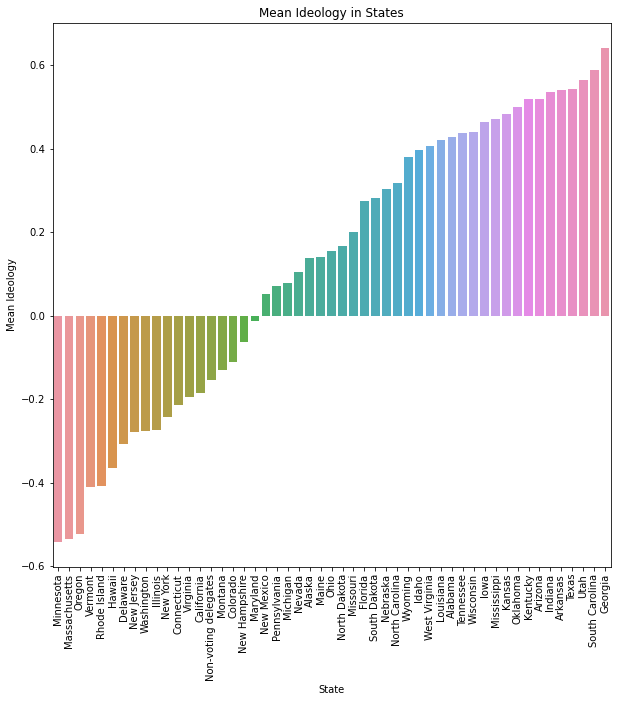

In [16]:
df = gbq.read_gbq(state_all_query, project_id='ntufbdata')
plot_state_distribution(df, 'User Amount in States')
plot_state_partisan(df, 'Trump Share in States')
plot_state_ideology(df, 'Mean Ideology in States')

In [18]:
state_query = '''
WITH USER_PARTISAN AS (
SELECT CAST(user_id AS STRING) AS user_id,
       user_PC1_mean_weighted AS user_ideology,
      CASE WHEN ABS(user_PC1_mean_weighted - 0.5564000026852998) < ABS(user_PC1_mean_weighted + 0.5878117419195912) THEN 'Trump' ELSE 'Clinton' END AS party
FROM `us_user_info.us_user_ideology_from_1000_page_and_politician_201501_to_201611_all`)
, USER_STATE AS (
SELECT CAST(user_id AS STRING) AS user_id,
        like_state_max AS state
FROM `us_user_info.us_user_like_state_max_unique`)
SELECT state,
        COUNT(*) AS user_amount,
        SUM(CASE WHEN party = 'Trump' THEN 1 ELSE 0 END)/ COUNT(*) AS Trump_share,
        SUM(CASE WHEN party = 'Clinton' THEN 1 ELSE 0 END)/ COUNT(*) AS Clinton_share,
        AVG(user_ideology) AS mean_ideology
FROM
(SELECT USER_PARTISAN.user_id,
        USER_PARTISAN.party,
        USER_PARTISAN.user_ideology,
        USER_STATE.state
FROM USER_PARTISAN
INNER JOIN USER_STATE ON USER_PARTISAN.user_id = USER_STATE.user_id) AS USER_INFO
GROUP BY state
ORDER BY state
'''

Downloading: 100%|██████████| 52/52 [00:00<00:00, 184.52rows/s]


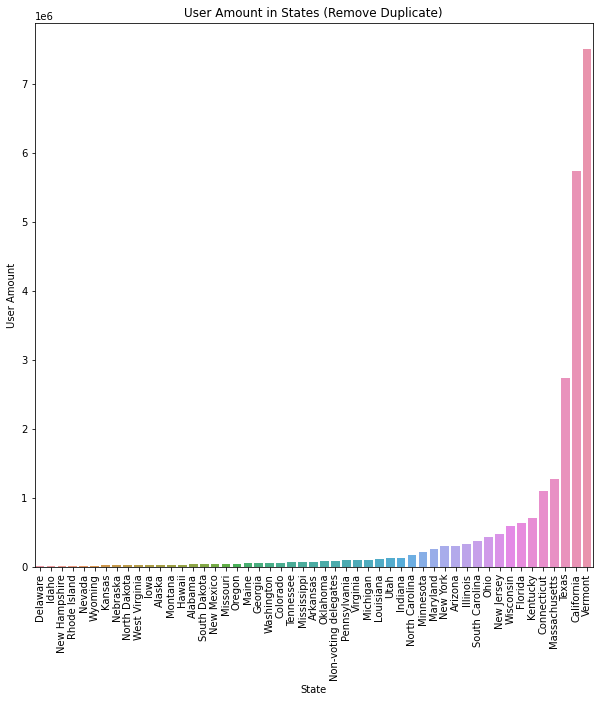

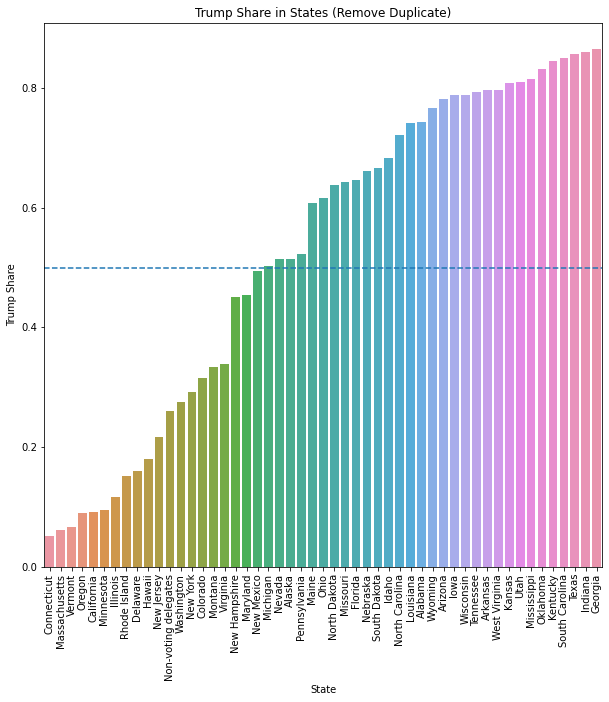

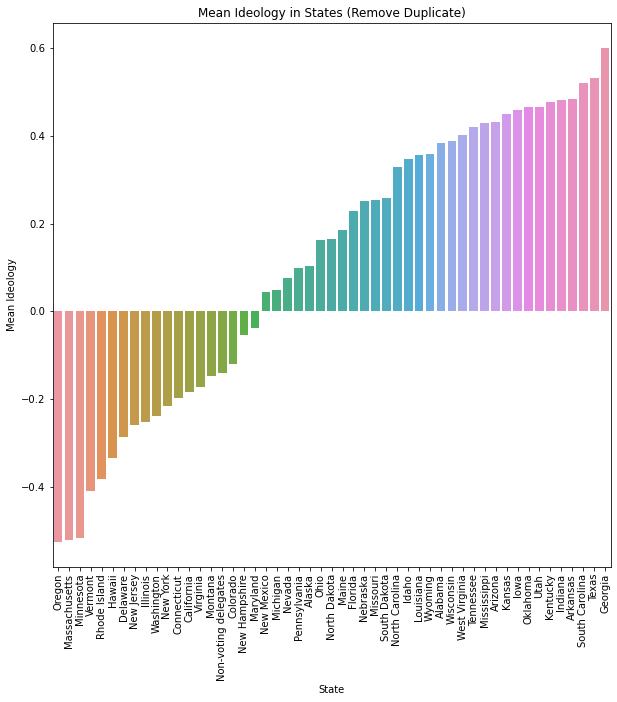

In [19]:
df = gbq.read_gbq(state_query, project_id='ntufbdata')
plot_state_distribution(df, 'User Amount in States (Remove Duplicate)')
plot_state_partisan(df, 'Trump Share in States (Remove Duplicate)')
plot_state_ideology(df, 'Mean Ideology in States (Remove Duplicate)')